# Principal Component Analysis

The idea behind PCA is to transform our dataset into something more useful for building models. What we want to do is to build new dimensions (predictors) out of the dimensions we are given in such a way that:

(1) each dimension we draw captures as much of the remaining variance among our predictors as possible; and <br/>
(2) each dimension we draw is orthogonal to the ones we've already drawn.

## Motivation

Think back to multiple linear regression for a moment.

The fundamental idea is that I can get a better prediction for my dependent variable by considering a *linear combination of my predictors* than I can get by considering any one predictor by itself.

$\rightarrow$ **PCA insight**: If the combinations of predictors work better than the predictors themselves, then let's just treat the combinations as our primary dimensions!

But one problem with having lots of predictors is that it raises the chance that some will be nearly *collinear*.

$\rightarrow$ **PCA insight**: Since we're reconstructing our dimensions anyway, let's make sure that the dimensions we construct are mutually orthogonal! <br/>
$\rightarrow$ **PCA insight**: Moreover, since we'll be capturing much of the variance among our predictors in the first few dimensions we construct, we'll be able in effect to *reduce  the dimensionality* of our problem. Thus PCA is a fundamental tool in *dimensionality reduction*.

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [133]:
cars = pd.read_csv('/Users/gdamico/Desktop/cars.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [134]:
cars[' cubicinches'].replace(' ', 0, inplace=True)
cars[' cubicinches'] = cars[' cubicinches'].map(float)
cars[' cubicinches'].replace(0, 261 / 259 * cars[' cubicinches'].mean(), inplace=True)

In [135]:
cars[' weightlbs'].replace(' ', 0, inplace=True)
cars[' weightlbs'] = cars[' weightlbs'].map(float)
cars[' weightlbs'].replace(0, 261 / 259 * cars[' weightlbs'].mean(), inplace=True)

In [136]:
cars[' cylinders'] = cars[' cylinders'].map(float)
cars[' hp'] = cars[' hp'].map(float)
cars[' time-to-60'] = cars[' time-to-60'].map(float)
cars[' year'] = cars[' year'].map(float)

In [137]:
# Here we'll define X and y



In [1]:
# Splitting up the data, using random_state=20



In [2]:
# Initializing a StandardScaler and fitting it to X_train




In [3]:
# Using the scaler to transform X_train and X_test



In [4]:
# Fitting a Linear Regression to our training data and scoring it



In [5]:
# Scoring on our test set



In [6]:
# Extracting the coefficients



Thus, our best-fit hyperplane is given by:

$-1.404\times cyl + 0.671\times in^3 - 0.478\times hp - 4.655\times lbs. -  0.177\times time_{60} + 2.426\times yr$

## PCA by Hand

The key idea is to diagonalize (i.e. find the eigendecomposition of) the covariance matrix. The decomposition will produce a set of orthogonal vectors that explain as much of the remaining variance as possible.

N.B.: What follows is indebted to http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda

In [7]:
# We'll start by producing the covariance matrix for the columns of X.



In [8]:
# Looking at the eigenvalues and -vectors of the covariance matrix



How does one calculate eigenvalues and -vectors by hand? https://www.scss.tcd.ie/~dahyotr/CS1BA1/SolutionEigen.pdf

In [9]:
# np.linalg.eig(X) returns a double of NumPy arrays, the first containing
# the eigenvalues of X and the second containing the eigenvectors of X.



In [10]:
# We'll now pair up each eigenvalue with its corresponding eigenvector.



In [11]:
# Let's look at the first element of eigpairs.



In [12]:
# The second element of each element in eigpairs is
# an eigenvector of the covariance matrix.



In [13]:
# We want to isolate the eigenvectors and create a matrix
# with a column for each. We'll use just three of these,
# corresponding to taking the first three principal components.





In [14]:
# Now we simply want the dot-product of
# X (scaled) with this matrix of the eigenvectors
# of the covariance matrix of X.





In [15]:
# Naturally, sklearn has a shortcut for this!





In [16]:
# Let's look at the explained variance



In [17]:
# And, perhaps more illuminatingly, the explained variance ratio



In [18]:
# Let's check out the components!



In [19]:
# Recalling the columns of X



The results of our PCA are as follows:

**PC1** = 0.454 * cylinders + 0.470 * cubicinches + 0.462 * hp + 0.440 * weightlbs - 0.357 * time-to-60 - 0.196 * year

**PC2** = -0.143 * cylinders - 0.110 * cubicinches - 0.023 * hp - 0.217 * weightlbs - 0.102 * time-to-60 - 0.954 * year

**PC3** = 0.204 * cylinders + 0.153 * cubicinches - 0.129 * hp + 0.361 * weightlbs + 0.860 * time-to-60 - 0.220 * year

It turns out that these loadings are encoded in the eigenvectors of $X^TX$.

In [171]:
np.linalg.eig(X_train_scaled.T.dot(X_train_scaled))

(array([831.89296173, 173.2972442 , 115.39489429,  27.78054068,
          7.55098614,  14.08337296]),
 array([[ 0.45428359,  0.14291435,  0.20379635,  0.67961113,  0.50160912,
          0.13485534],
        [ 0.46981923,  0.10997626,  0.15338549,  0.16594714, -0.80991469,
          0.24525035],
        [ 0.46221055,  0.02283259, -0.12904059, -0.60388355,  0.29385384,
          0.56405955],
        [ 0.44018826,  0.21748331,  0.36095739, -0.35760605,  0.0666361 ,
         -0.70450168],
        [-0.35673244,  0.10212088,  0.86010439, -0.13386428,  0.03959866,
          0.32100784],
        [-0.1955351 ,  0.95353643, -0.2195875 , -0.01063884, -0.00824435,
          0.06429994]]))

Notice that:

- the absolute values of the components of PC1 are the first components of the eigenvectors below, <br/>
- the absolute values of the components of PC2 are the second components of the eigenvectors below, <br/>
- etc. <br/>

We'll have more to say about this when we examine the singular value decomposition of matrices in Mod 4.

## Normality

In [20]:
# These principal components should be normalized.
# If they are, then the sum of the squares of the
# loadings should be 1. Let's check!

mag0 = 0



In [21]:
mag1 = 0




In [22]:
mag2 = 0




## Orthogonality

In [23]:
# These principal components should also be
# mutually orthogonal. If they are, then the
# dot product of any two of them should be 0.
# Let's check!

dot_prod01 = 0




In [24]:
dot_prod02 = 0




In [25]:
dot_prod12 = 0





## Visualizations

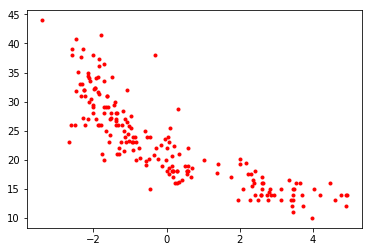

In [180]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(X_train_new[:, 0], y_train, 'r.');

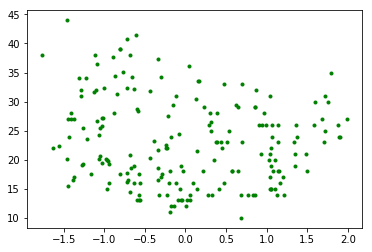

In [181]:
fig, ax = plt.subplots()
ax.plot(X_train_new[:, 1], y_train, 'g.');

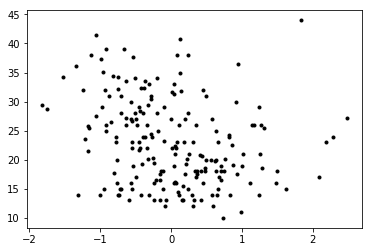

In [182]:
fig, ax = plt.subplots()
ax.plot(X_train_new[:, 2], y_train, 'k.');

Question: Is the first principal component the same line we would get if we constructed an ordinary least-squares regression line?

Check out this post for an illuminating discussion: https://shankarmsy.github.io/posts/pca-vs-lr.html

## Modeling with New Dimensions

Now that we have optimized our features, we can build a new model with them!

In [183]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_new, y_train)
lr_pca.score(X_train_new, y_train)

0.7892548502816537

In [184]:
X_test_new = pca.transform(X_test_scaled)

In [185]:
lr_pca.score(X_test_new, y_test)

0.7095791239247092

In [187]:
lr_pca.coef_

array([-3.0040062 , -1.14541866, -2.48654894])

Thus, our best-fit hyperplane is given by:

$-3.00\times PC1 - 1.15\times PC2 -2.49\times PC3$

Of course, since the principal components are just linear combinations of our original predictors, we could re-express this hyperplane in terms of those original predictors!

And if the PCA was worth anything, we should expect the new linear model to be *different from* the first!

Recall that we had:

**PC1** = 0.454 * cylinders + 0.470 * cubicinches + 0.462 * hp + 0.440 * weightlbs - 0.357 * time-to-60 - 0.196 * year

**PC2** = -0.143 * cylinders - 0.110 * cubicinches - 0.023 * hp - 0.217 * weightlbs - 0.102 * time-to-60 - 0.954 * year

**PC3** = 0.204 * cylinders + 0.153 * cubicinches - 0.129 * hp + 0.361 * weightlbs + 0.860 * time-to-60 - 0.220 * year

Therefore, our new PCA-made hyperplane can be expressed as:

$-3.00\times(0.454\times cyl + 0.470\times in^3 + 0.462\times hp + 0.440\times lbs. - 0.357\times time_{60} - 0.196\times yr)$ <br/> $- 1.15\times(-0.143\times cyl - 0.110\times in^3 - 0.023\times hp - 0.217\times lbs. - 0.102\times time_{60} - 0.954\times yr)$ <br/> $- 2.49\times(0.204\times cyl + 0.153\times in^3 - 0.129\times hp + 0.361\times lbs. + 0.860\times time_{60} - 0.220\times yr)$ <br/><br/> $= -1.706\times cyl - 1.664\times in^3 -1.038\times hp - 1.969\times lbs. -3.095\times time_{60} + 2.233\times yr$

Our first linear regression model had:

$-1.404\times cyl + 0.671\times in^3 - 0.478\times hp - 4.655\times lbs. -  0.177\times time_{60} + 2.426\times yr$,

which is clearly a different hyperplane.